# Maximizing Revenue for taxi Cab Drivers through payment Type analysis

# Problem Statement

 In the fast-paced taxi booking sector, making the most of revenue is essential for long-term sucess and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal to run an A/b test to examine the relationship between the total fare and the method of payment . We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

# Research Question

Is there a relationship between total fare amount and payment type and car we nudge customers towards payment method that generate higher revenue for drivers,without negatively impacting experience?

#  Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [105]:
df=pd.read_csv('yellow_tripdata_2020-01.csv')

In [96]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis(EDA)

In [53]:
df.shape

(6405008, 18)

In [54]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [55]:
# Converting pickup and dropoff into datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [56]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

# Duration

In [57]:
# Converting into minutes
df['Duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'] 
df['Duration']=df['Duration'].dt.total_seconds()/60 #(.dt.total_second()/60) it will convert second ito mint

In [58]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


# Filitering The Data


There are so many columns in the dataset, but as per our problem statement, we only require some fields from the orginal data.rest columns are nothing but the unwanted columns for this study.So we will simply remove those columns.

As the problem statement is revolving around the payment type, fare amount,and other factor influencing the fare amount,we will filiter the data to have only passenger count, trip distance,payment type,fare amount and duration of the trip.

In [59]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [60]:
# checking missing values
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [61]:
# percentage of missing data to the total record of the data
(65441/len(df))*100 

1.021716132126611

In [62]:
#As the data has only 15 of data missing, we can simply drop the records with missing values.
df.dropna(inplace=True)

In [63]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [64]:
# converting Float column into integer
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [65]:
#checking for the duplicates rows
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df['passenger_count'].value_counts(normalize=True)  #.value_counts() it gives frequency/ (normalize=True) it gives % of the contribution

passenger_count
1    0.616474
2    0.204655
3    0.071633
5    0.068517
4    0.038721
Name: proportion, dtype: float64

In [78]:
df['payment_type'].value_counts(normalize=True) 

payment_type
Card    0.685467
Cash    0.314533
Name: proportion, dtype: float64

We will focus solely on payment types 'card' and 'cash',denoted by 1 and 2 in the dataset. To ensure our analysis centers on payment method,we'll filter the data accordingly, excluding all over other types.

Moreover,examining the distribution of passenger counts reveals that trip more than 5 passengers are rare. Additionally,trips with 0 passenger are impossible, as we expect at least one passenger to pay the fare amount.Therefore,we will filiter the passenger count to include only values ranging from 1 to 5.

In [69]:
# Filtring for payment type 1 and 2
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [79]:
df.shape

(2748932, 5)

In [80]:
# replacing the payment type encoded value 1 to 2
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [81]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [82]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df =df[df['Duration']>0]

In [74]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [83]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

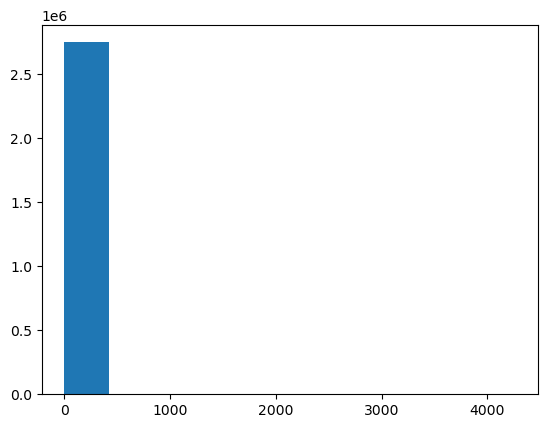

In [27]:
plt.hist(df['fare_amount'])	

{'whiskers': [<matplotlib.lines.Line2D at 0x24a675fc710>,
 'caps': [<matplotlib.lines.Line2D at 0x24aac96c550>,
 'boxes': [<matplotlib.lines.Line2D at 0x24aac831e50>],
 'medians': [<matplotlib.lines.Line2D at 0x24a92170210>],
 'fliers': [<matplotlib.lines.Line2D at 0x24aac895fd0>],
 'means': []}

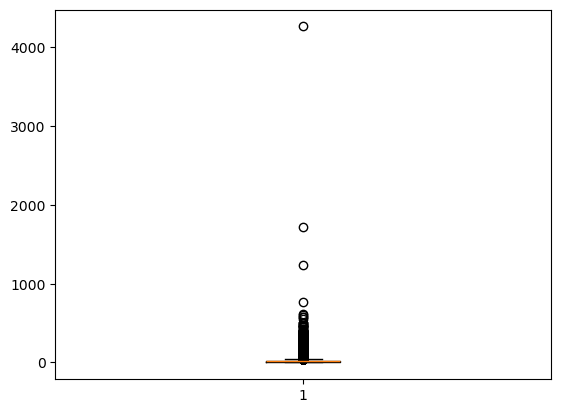

In [84]:
#check for the outliers
plt.boxplot(df['fare_amount'])	

# using of IQR to remove Outliers

In [85]:
for col in['fare_amount', 'trip_distance','Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR =q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


In [86]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


We're intersetd on  exploring the relationship between payment type and passeneger behaviour concerning trip distance and free amount. Are there variations in the distribution of payments concering different fare amount or trip distance ?

To investigate this, we'll plot a histograms to visualize the distribution of passenger counts paying with either card or cash. This also provide stackeholders with insight into fare amount ranges associated with different payment mehods.


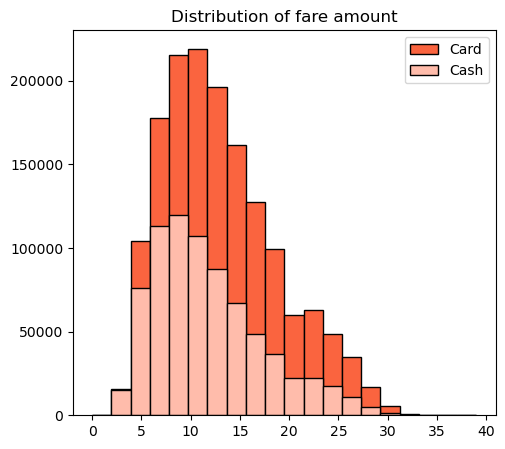

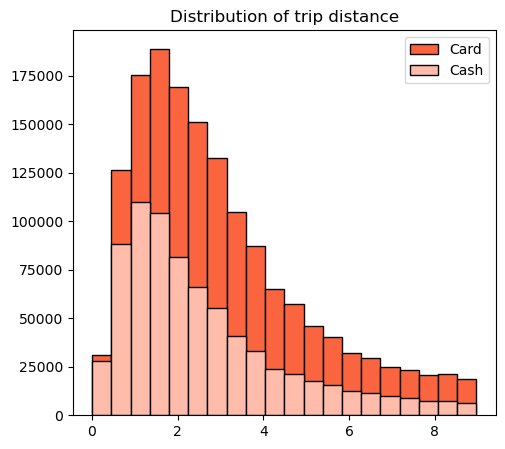

In [87]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F',label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color ='#FFBCAB', label ='Cash')
plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F',label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color ='#FFBCAB', label ='Cash')
plt.legend()
plt.show()

In [88]:
# calculating the mean and std.deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

Now,in order to examine the passenger's preference regarding their nchoice of payment method, we will assess the proporation of the two payment type. To provide a visual represntation,we have opted to utilize a pie chart. This graphical dephical will offer a clear and intuitive understanding between the two payment methods chosen by passengers.

([<matplotlib.patches.Wedge at 0x24aaba3ff50>,
 [Text(-0.9410713439559123, -0.5695478255467341, 'Card'),
  Text(0.9410713972808242, 0.5695477374372734, 'Cash')],
 [Text(-0.5133116421577703, -0.31066245029821854, '67.3%'),
  Text(0.5133116712440858, 0.3106624022385127, '32.7%')])

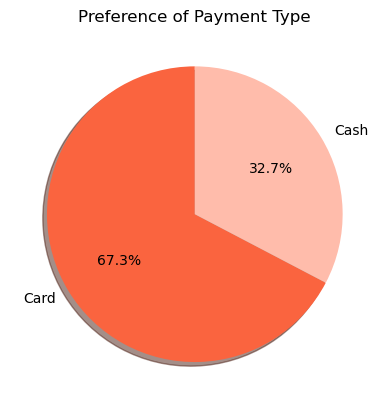

In [89]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])

Subsequently,we aim to conduct an anlysis of the payment types in relation to the passenger count.Our objective is to investigate if there are any changes in preference contingent upon the number of passenger traveling in the cab.

To facilite this examination,we have employed a visualization technique known as a stacked bar plot. This method is particulary advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Throughthis ngraphical represntation,we can gain insights into potential variatrions in payment preferences across different passenger counts.

# Passenger Count Analysis

1.Among card payments, rides with a single passenger (passenger_count = 1) comprise the largest proportion, constituting 40.08% of all card transactions.

2.Similary, cash payments are predominantly associated with single-passenger rides, making up 20.04% of all cash transactions.

3.There is a noticeable decrease in the percentage of transactions as the passeneger count increase,suggesting that large group are less likely to use taxis or may opt for alternative methods.

4.These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behaviour and preferences

In [90]:
passenger_count =df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

In [91]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


# Stacked Bar Chart

In [92]:
# creating a DataFrame for Stacked bar chart

df= pd.DataFrame(columns =['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


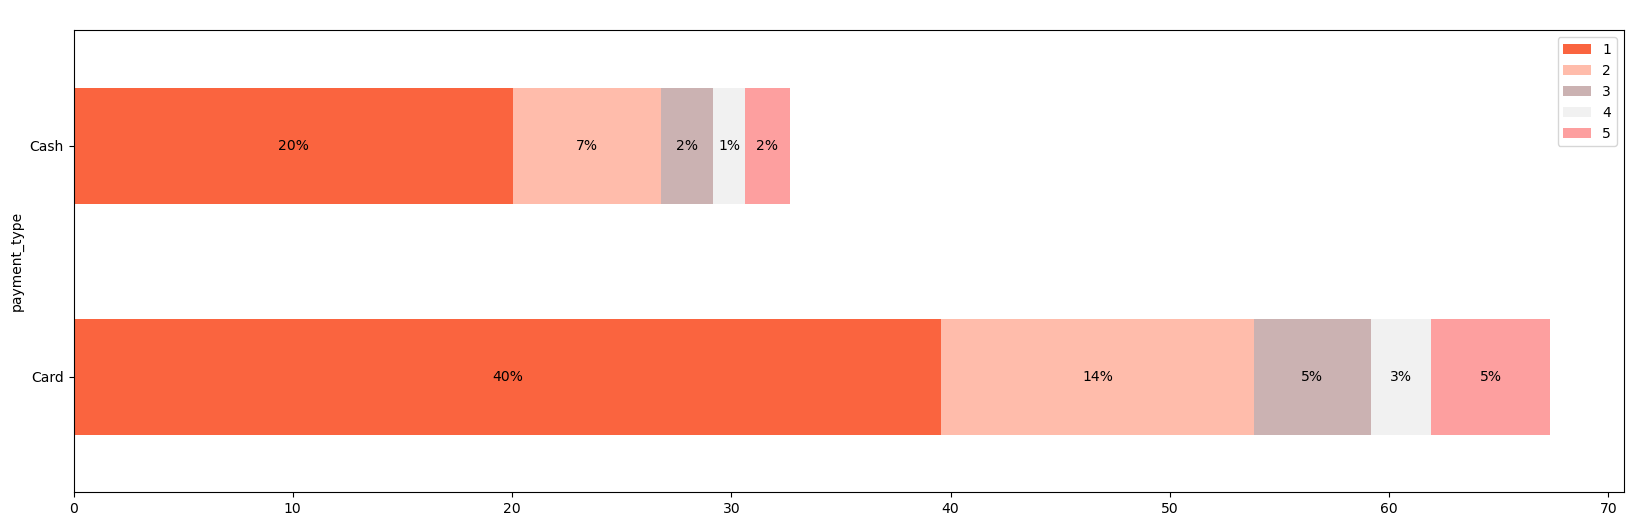

In [93]:

# Create the plot
fig, ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# Add Percentage text
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.text(x + width / 2,  # Corrected x position for text
            y + p.get_height() / 2,  # Corrected y position for text
            '{:.0f}%'.format(width),  # Corrected format function
            horizontalalignment='center',
            verticalalignment='center')

plt.show()


# Hypthesis Testing

In order to select the most suitable test for our scenario,our initial step involves evalutaing whether the distribution of fare amount adheres to a normal distribution.While the histogram depicted above suggests otherwise, we will further confirm thsi by generation a QQ plot.

Quantile-quantile(QQ) plots can be used to assess whether the fare amount distribution for each payment type are approximately normally distributed.If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

# Quantile Quantile plot(QQ Plot) 

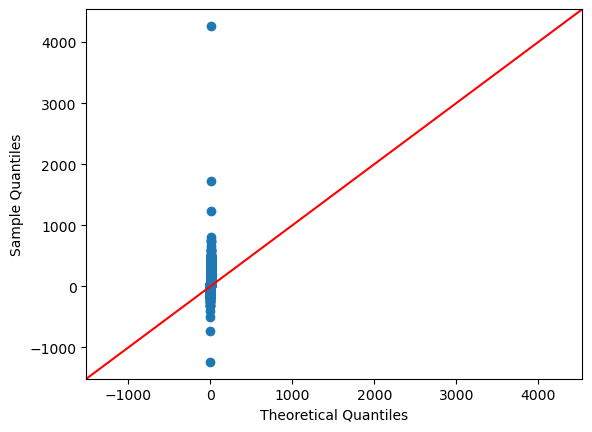

In [97]:
sm.qqplot(df['fare_amount'], line= '45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution.So, Z distribution will not be good for this.That's why we will use T-test.

Given that T-test can be applied to both small and large samples and does not require population standard deviation,it is amore universally applicable approach for hypothesis testing in many practical research scenarios,including analyses of taxi trip data.

In the analysis NYC Yellow Taxi Trip Record,where you're likely dealing with an unknown population standard deviation and potentially large dataset,the T-test offers a more appropriate and flexible method for comparing means between two group(e.g., fare amounts by payment type). It provides a relaible way to infer about the population,accommodating the uncertainty that comes with estimating population parameters from sample data.

### Null hypothesis:There is no difference in average fare between customers who use credit cards and customer who use cash.

### Alternative hypothesis:There is a difference in average fare between customer who use credit cards and customer who use cash

# T-test

In [99]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample =df[df['payment_type']=='Cash']['fare_amount']

In [100]:
t_stats, p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var = False)
print('T statistic', t_stats, 'p_value',p_value)

T statistic nan p_value nan


Reject the null hypothesis

Since the p-value is significantly smaller than the significance level of 5% ,we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insihjt is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.